# EDA for Transactions

# Sales

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

## Import Data

In [2]:
holidays = pd.read_csv("../../datasets/holidays_events.csv")
oil = pd.read_csv("../../datasets/oil.csv")
stores = pd.read_csv("../../datasets/stores.csv")
transactions = pd.read_csv("../../datasets/transactions.csv") 

train = pd.read_csv("../../datasets/train.csv")
test = pd.read_csv("../../datasets/test.csv")


holidays["date"] = pd.to_datetime(holidays["date"])
oil["date"] = pd.to_datetime(oil["date"])
transactions["date"] = pd.to_datetime(transactions["date"])

train["date"] = pd.to_datetime(train["date"])
test["date"] = pd.to_datetime(test["date"])

## Exploratory Data Analysis

### Transactions

In [3]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [4]:
temp = transactions.merge(train.groupby(["date", "store_nbr"])["sales"].sum(), on=["date", "store_nbr"])
temp

,date,store_nbr,transactions,sales
0,2013-01-01,25,770,2511.618999
1,2013-01-02,1,2111,7417.148000
2,2013-01-02,2,2358,10266.718981
3,2013-01-02,3,3487,24060.348000
4,2013-01-02,4,1922,10200.083980
...,...,...,...,...
83483,2017-08-15,50,2804,16879.121004
83484,2017-08-15,51,1573,20154.559000
83485,2017-08-15,52,2255,18600.046000
83486,2017-08-15,53,932,8208.189000


In [5]:
print("Correlation between sales and transactions : "   , temp.corr()["sales"]["transactions"])

Correlation between sales and transactions :  0.8373836801431863


### Checking sales by day of week, day of month and month

In [6]:
temp = transactions.copy()
temp["weekday"] = temp["date"].apply(lambda x: x.weekday())
temp["day"] = temp["date"].apply(lambda x : x.day)
temp["month"] = temp["date"].apply(lambda x : x.month)
temp["year"] = temp["date"].apply(lambda x : x.year)
temp

,date,store_nbr,transactions,weekday,day,month,year
0,2013-01-01,25,770,1,1,1,2013
1,2013-01-02,1,2111,2,2,1,2013
2,2013-01-02,2,2358,2,2,1,2013
3,2013-01-02,3,3487,2,2,1,2013
4,2013-01-02,4,1922,2,2,1,2013
...,...,...,...,...,...,...,...
83483,2017-08-15,50,2804,1,15,8,2017
83484,2017-08-15,51,1573,1,15,8,2017
83485,2017-08-15,52,2255,1,15,8,2017
83486,2017-08-15,53,932,1,15,8,2017


In [7]:
weekdays_stat = temp.groupby(temp["weekday"])["transactions"].sum()
px.line(weekdays_stat, y="transactions", title="Transactions by weekdays")

In [8]:
temp = temp.groupby("date")["transactions"].sum().reset_index()
temp["weekday"] = temp["date"].apply(lambda x: x.weekday())
temp["day"] = temp["date"].apply(lambda x : x.day)
temp["month"] = temp["date"].apply(lambda x : x.month)
temp["year"] = temp["date"].apply(lambda x : x.year)
temp["cluster"] = (temp["year"] - 2013) * 12 + temp["month"]

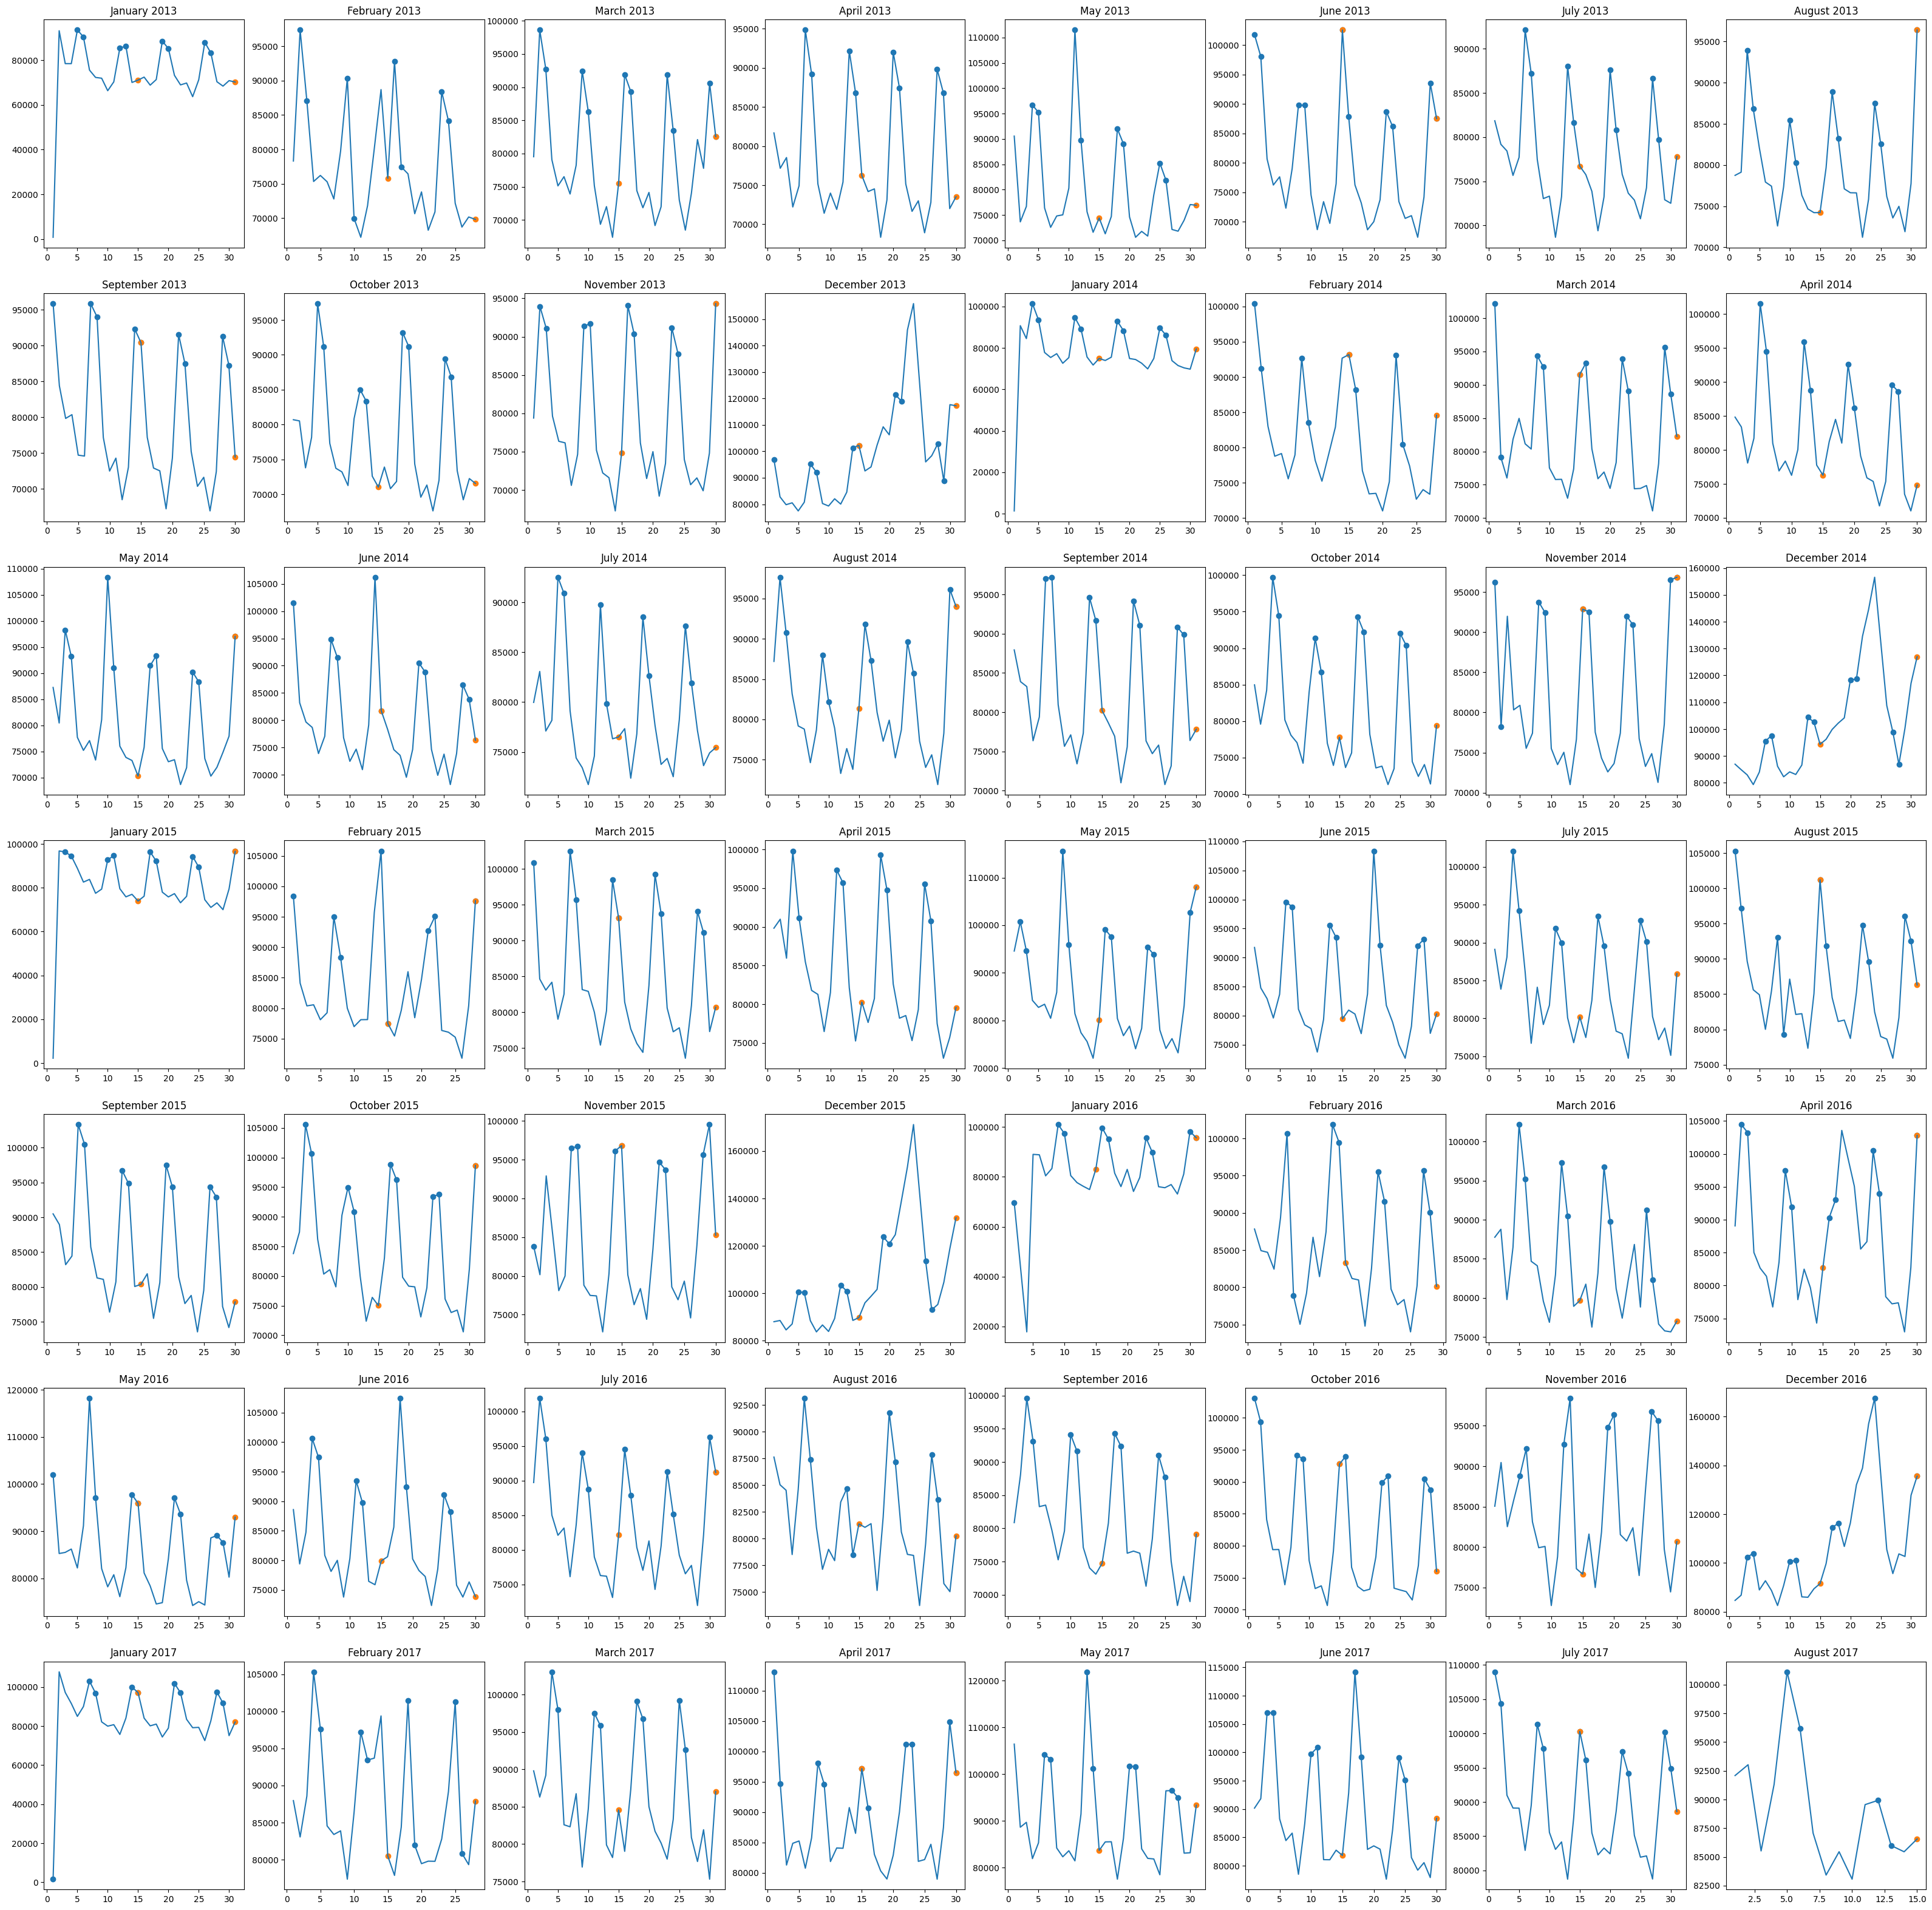

In [9]:
import calendar

plt.figure(figsize=(40, 40))
for cluster in range(1, 57):
    plt.subplot(7, 8, cluster)
    cluster_dataframe = temp[temp["cluster"] == cluster]
    plt.plot(cluster_dataframe["date"].apply(lambda x : x.day), cluster_dataframe["transactions"])
    weekends = cluster_dataframe[(cluster_dataframe["date"].apply(lambda x : x.weekday()) == 5) |
                                    (cluster_dataframe["date"].apply(lambda x : x.weekday()) == 6) ]
    
    paydays = cluster_dataframe[(cluster_dataframe["date"].apply(lambda x : x.day) == 15) |
                                             (cluster_dataframe["date"].apply(lambda x : x.day) == (max(cluster_dataframe["date"].apply(lambda x : x.day))))]
    plt.scatter(weekends["date"].apply(lambda x : x.day), weekends["transactions"])
    plt.scatter(paydays["date"].apply(lambda x : x.day), paydays["transactions"])
    plt.title(calendar.month_name[cluster_dataframe["month"].iloc[0]] +  " " + cluster_dataframe["year"].iloc[0].astype(str))

In [10]:
temp_stores = transactions.copy()
temp_stores["weekday"] = temp_stores["date"].apply(lambda x : x.weekday())
temp_stores = temp_stores.groupby(["store_nbr", "weekday"])["transactions"].sum().reset_index()
temp_stores

,store_nbr,weekday,transactions
0,1,0,416658
1,1,1,418655
2,1,2,447117
3,1,3,416249
4,1,4,421056
...,...,...,...
373,54,2,178490
374,54,3,176779
375,54,4,188476
376,54,5,233623


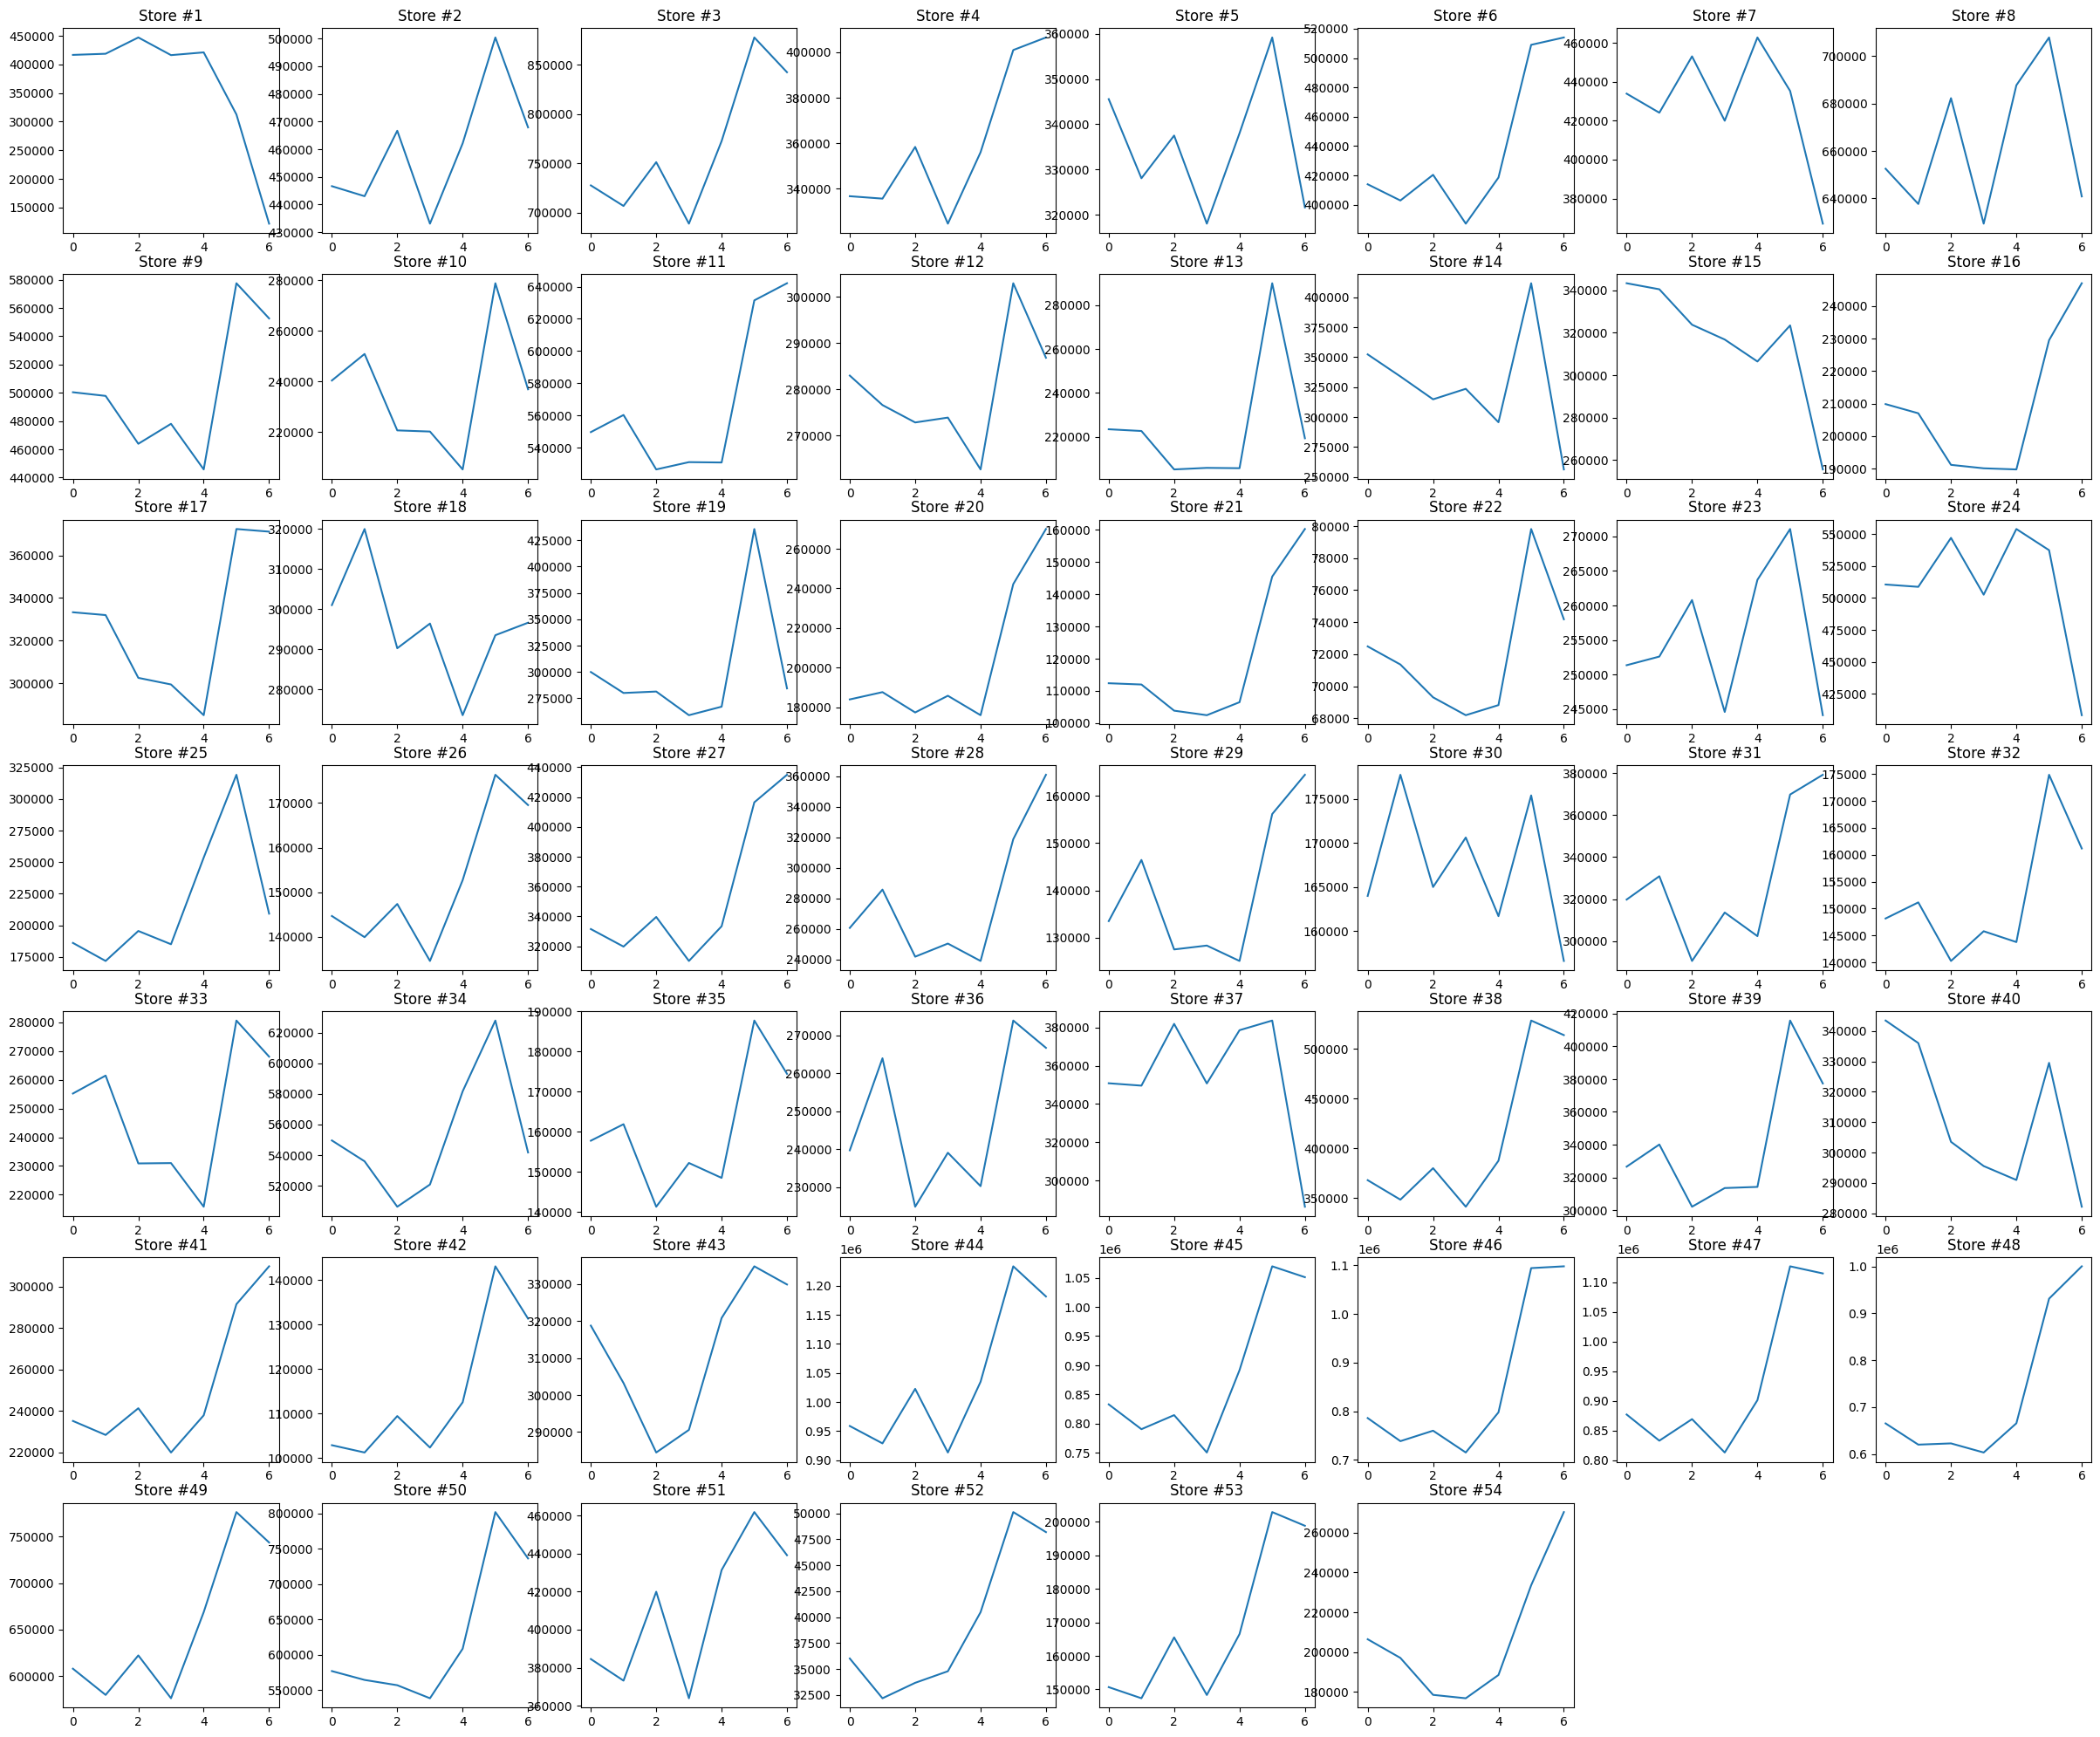

In [11]:
plt.figure(figsize=(30, 25))

for store_nbr in range(1, 55):
    plt.subplot(7, 8, store_nbr)
    store_dataframe = temp_stores[temp_stores["store_nbr"] == store_nbr]
    plt.plot(store_dataframe["weekday"], store_dataframe["transactions"])
    plt.title("Store #" + store_dataframe["store_nbr"].iloc[0].astype(str))

#### Results of hypothesis testing:
##### Confirmed Hypotheses :
1. __Testing sales by day of the week__. 

    The number of transactions is greatly increased on weekends, which can be a great attribute.

##### Disproved Hypotheses :
1. __Testing sales by day of the month__

     Very unclear relationship between the number of transactions and payroll days, unlikely to be a good attribute.

2. __Sales by month__ 

    No correlation between months and transactions.

3. __Checking store schedules__ 
    
    All stores are open 7 days a week.

##### Comments: 

1. In late December, sales increase a lot due to the holidays. 
2. In April 2016, there is a spike in sales on the back of the earthquake 

This data can be removed from the training dataset as outliers